# Curso de Machine Learning Aplicado con Python

![Machine-Learning](assets/Machine-Learning.jpg)

Podemos encontrar mas datasets en https://www.kaggle.com/datasets

Las librerías con las que vamos a trabajar y que tenemos que cargar son:

1. Numpy
2. Pandas
3. Matplotlib.pyplot
4. Seaborn


In [1]:
# importamos las librerias
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
print("""
Version Numpy:     \t{} 
Version Pandas:    \t{} 
Version Matplotlib:\t{}
Version seaborn:   \t{}""".format(np.__version__,pd.__version__,matplotlib.__version__,sb.__version__))



Version Numpy:     	1.13.1 
Version Pandas:    	0.20.3 
Version Matplotlib:	2.0.2
Version seaborn:   	0.8.0


In [2]:
# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
%matplotlib inline

## Carguemos  en un pandas dataframe nuestra base de datos

`pd.read_csv` es el metodo que nos permite importar los datos desde un CSV y cargarlo en un **DataFrame**, que es la estructura de base de Pandas

In [54]:
movies = pd.read_csv('IMDb_dataset.csv', encoding='utf-8')

In [55]:
type(movies) # Esto es de tipo dataframe

pandas.core.frame.DataFrame

In [56]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### La columna en la que nos deberiamos enfocar es gross que es ingreso bruto, pero ya que no tenemos esa columna trabajaremos con revenue

In [57]:
#Que dimensiones tiene nuestro dataset
movies.shape

(5043, 28)

## Varios de los comandos utiles para pandas podemos encontrarlos [aquí](https://github.com/WillArevalo/Big-Data-and-Data-Science/blob/master/pandas-cheat-sheet.pdf)

In [58]:
#Nombres de las columnas
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [59]:
#Accedemos al index de las filas 
movies.index

RangeIndex(start=0, stop=5043, step=1)

In [61]:
#Accediendo a una columna 
columna1 = movies['movie_title']
columna1.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

In [62]:
#Accediendo a una fila
linea1 = movies.loc[10,:]
linea1

color                                                                    Color
director_name                                                      Zack Snyder
num_critic_for_reviews                                                     673
duration                                                                   183
director_facebook_likes                                                      0
actor_3_facebook_likes                                                    2000
actor_2_name                                                      Lauren Cohan
actor_1_facebook_likes                                                   15000
gross                                                              3.30249e+08
genres                                                 Action|Adventure|Sci-Fi
actor_1_name                                                      Henry Cavill
movie_title                                Batman v Superman: Dawn of Justice 
num_voted_users                                     

## Inspección de los tipos de datos

### Datos importantes:

* La **inspección de los datos** se da para tener conocimiento de la salud de los datos que tenemos, saber si vienen limpios o no, y también porque se quiere tener un entendimiento cuantitativo de ellos. Parte de esto es mirar gráficos estadísticos y entender diferentes propiedades numéricas de las columnas.
* A diferencia de **Numpy, Pandas** no solo permite cargar datos numéricos, sino también datos de texto.
* El método info nos va a mostrar la cantidad completa de columnas con la cantidad de elementos no nulos que hay en esas columnas, y por último muestra el tipo de cada columna.



In [63]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [64]:
#Columnas numericas y columnas de texto
movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [65]:
#Miramos si es una columna de numeros de punto flotante o no
movies.dtypes == float

color                        False
director_name                False
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                 False
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster          True
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews          True
language                     False
country                      False
content_rating               False
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [66]:
# Si la columna es float o entera
(movies.dtypes == float) | (movies.dtypes == int)

color                        False
director_name                False
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                 False
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster          True
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews          True
language                     False
country                      False
content_rating               False
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [67]:
# Comprobar si es una columna de texto o no
movies.dtypes == object

color                         True
director_name                 True
num_critic_for_reviews       False
duration                     False
director_facebook_likes      False
actor_3_facebook_likes       False
actor_2_name                  True
actor_1_facebook_likes       False
gross                        False
genres                        True
actor_1_name                  True
movie_title                   True
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                  True
facenumber_in_poster         False
plot_keywords                 True
movie_imdb_link               True
num_user_for_reviews         False
language                      True
country                       True
content_rating                True
budget                       False
title_year                   False
actor_2_facebook_likes       False
imdb_score                   False
aspect_ratio                 False
movie_facebook_likes         False
dtype: bool

In [68]:
num = (movies.dtypes == float) | (movies.dtypes == int)
num

color                        False
director_name                False
num_critic_for_reviews        True
duration                      True
director_facebook_likes       True
actor_3_facebook_likes        True
actor_2_name                 False
actor_1_facebook_likes        True
gross                         True
genres                       False
actor_1_name                 False
movie_title                  False
num_voted_users              False
cast_total_facebook_likes    False
actor_3_name                 False
facenumber_in_poster          True
plot_keywords                False
movie_imdb_link              False
num_user_for_reviews          True
language                     False
country                      False
content_rating               False
budget                        True
title_year                    True
actor_2_facebook_likes        True
imdb_score                    True
aspect_ratio                  True
movie_facebook_likes         False
dtype: bool

In [69]:
num.index

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [70]:
for el in num.index:
    print(el)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [71]:
#Solo las columnas que son numericas
num_cols = [c for c in num.index if num[c]]
num_cols

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio']

In [23]:
movies.dtypes == int

budget                  False
genres                  False
homepage                False
id                      False
keywords                False
original_language       False
original_title          False
overview                False
popularity              False
production_companies    False
production_countries    False
release_date            False
revenue                 False
runtime                 False
spoken_languages        False
status                  False
tagline                 False
title                   False
vote_average            False
vote_count              False
dtype: bool

In [72]:
#Solo las que son texto
movies.dtypes == object
obj = (movies.dtypes == object)
cols_obj = [c for c in obj.index if obj[c]]
cols_obj

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'language',
 'country',
 'content_rating']

## Inspección cuantitativa y de salud de los datos

In [74]:
movies_num = movies[num_cols]
movies_num.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35
4,NaN,NaN,131.0,NaN,131.0,NaN,0.0,NaN,NaN,NaN,12.0,7.1,NaN


In [75]:
# Estadistica de las columnas númericas
movies_num.describe()

# Count = cuantos valores ahi
# mean = promedio
# std = desviacion estandar
# min = minimo
# 25%, 50%, 75% = cuartiles
# max = maximo


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000


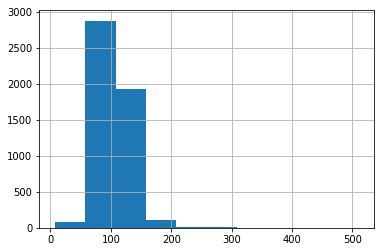

In [81]:
# Ver la informacion en plots
movies_num['duration'].hist()

## Podemos ver que alrededor de 2800 peliculas estan entre los +-70mins y los 120mins
## Y que el promedio de duracion es de 107mins de acuerdo con la tabla descriptiva

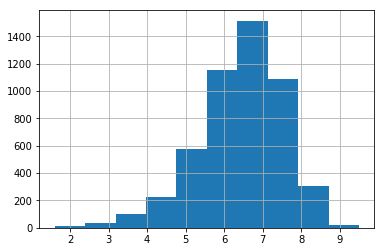

In [82]:
movies_num['imdb_score'].hist()
# movies_num['imdb_score'].hist(log='true') asi podriamos ver en orden logaritmico
# Podemos ver que la mayoria de las peliculas oscilan entre un puntaje de 6.2 y +-7.1
# Por la tabla descriptiva podemos deducir que el promedio de puntaje es de 6.442138

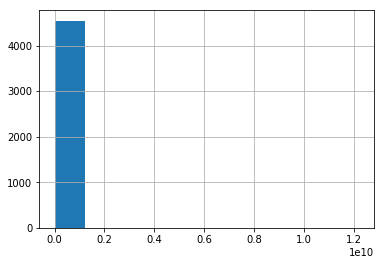

In [86]:
movies_num['budget'].hist() #Haremos un histogram de el presupuesto


##### Aqui se presenta que esta no grafica no tiene una distribucion gaussiana normal, 

##### Que podemos deducir de este histogram

##### Que todos los valores esta en el primer rango de valores, entre 0.0 y 0.1 multiplicado por $10^{10}$ ($1e10$)

##### Inferiores al billon de dolares de presupueto, pero si hay pocas que sobrepasan este budget


*Para poder debuggear esta situación utilizaremos una tecnica muy tipica de pandas que se llama **boolean filtering**. Basicamente construimos una serie de booleanos con el mismo indice que nuestro dataframe(La serie clasicamente la llamaremos mask)*

In [88]:
#Tomamos la columna problematica y vemos que peliculas superan el budget de el billon de dolares
movies_num['budget'] > 1e9
# Por lo que vemos son muy pocas

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5013    False
5014    False
5015    False
5016    False
5017    False
5018    False
5019    False
5020    False
5021    False
5022    False
5023    False
5024    False
5025    False
5026    False
5027    False
5028    False
5029    False
5030    False
5031    False
5032    False
5033    False
5034    False
5035    False
5036    False
5037    False
5038    False
5039    False
5040    False
5041    False
5042    False
Name: budget, Length: 5043, dtype: bool

In [89]:
# Averiguamos cuantas superan el billon contando los trues de la condicion
(movies_num['budget'] > 1e9).value_counts()
# y lo que nos arrojo es que solo existen 6 peliculas que superan el billon de dolares(mil millones)
# Lo que nos hace caer en cuenta que los datos que arroja el histograma no son correctos por estos datos que se salen del scope normal
# por lo tanto se debugean

False    5037
True        6
Name: budget, dtype: int64

In [118]:
# Entonces lo que hacemos es tomar esta serie booleana y la guardamos en una variable para ver que peliculas son las que causan este problema
mask = (movies_num['budget'] > 1e9)
# y le decimos al dataset principal que no muestre estos datos
budget = movies[mask]
budget

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
3423,Color,Katsuhiro Ôtomo,150.0,124.0,78.0,4.0,Takeshi Kusao,6.0,439162.0,Action|Animation|Sci-Fi,...,430.0,Japanese,Japan,R,1.100000e+09,1988.0,5.0,8.1,1.85,0
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000


In [120]:
budget[['movie_title','budget', 'country','language']]
#Con esta informacion nos podemos dirigir a examinar una de las peliculas para saber que esta pasando


,movie_title,budget,country,language
2323,Princess Mononoke,2.400000e+09,Japan,Japanese
2334,Steamboy,2.127520e+09,Japan,Japanese
2988,The Host,1.221550e+10,South Korea,Korean
3005,Fateless,2.500000e+09,Hungary,Hungarian
3423,Akira,1.100000e+09,Japan,Japanese
3859,Lady Vengeance,4.200000e+09,South Korea,Korean


![Akira](assets/Akira.png)Podemos ver el que budget en su numero es correcto pero esta en yenes y no en dolares, por lo que tendremos que hacer la conversion

In [123]:
## Esto es clasico en un dataset, ya que la mayoria de las veces los datos no vienen limpios

In [151]:
 movies[(movies['country'] == 'USA') | (movies['country'] == 'UK')][['movie_title','country','budget']]

,movie_title,country,budget
0,Avatar,USA,237000000.0
1,Pirates of the Caribbean: At World's End,USA,300000000.0
2,Spectre,UK,245000000.0
3,The Dark Knight Rises,USA,250000000.0
5,John Carter,USA,263700000.0
6,Spider-Man 3,USA,258000000.0
7,Tangled,USA,260000000.0
8,Avengers: Age of Ultron,USA,250000000.0
9,Harry Potter and the Half-Blood Prince,UK,250000000.0
10,Batman v Superman: Dawn of Justice,USA,250000000.0


In [157]:
print("Vemos que es son pocas peliculas las que tocaria limpiar ya que de solo los paises UK y USA se tienen 4255 peliculas y estan bien y el resto abria que examinarlas")
print("Cantidad total de peliculas:",movies.shape[0])

Vemos que es son pocas peliculas las que tocaria limpiar ya que de solo los paises UK y USA se tienen 4255 peliculas y estan bien y el resto abria que examinarlas
Cantidad total de peliculas: 5043


In [158]:
movies_remaster = movies

In [204]:

movies_fix = movies_remaster[(movies_remaster.country != 'USA') & (movies_remaster.country != 'UK')]
movies_remaster[(movies_remaster.country != 'USA') & (movies_remaster.country != 'UK')].shape

(788, 28)

In [247]:

movies_fix.groupby('country')['country'].count().sort_values(ascending=False)


country
France                  154
Canada                  126
Germany                  97
Australia                55
India                    34
Spain                    33
China                    30
Italy                    23
Japan                    23
Hong Kong                17
Mexico                   17
New Zealand              15
South Korea              14
Ireland                  12
Russia                   11
Denmark                  11
Norway                    8
Brazil                    8
South Africa              8
Sweden                    6
Netherlands               5
Poland                    5
Thailand                  5
Romania                   4
Belgium                   4
Iran                      4
Argentina                 4
Israel                    4
Iceland                   3
Czech Republic            3
                       ... 
Hungary                   2
Greece                    2
United Arab Emirates      1
Cambodia                  1
Slovakia    

In [248]:
#Podemos concluir que debemos arreglar 63 paises por su tipo de moneda probablemente, cabe aclarar que muchos pueden estar en dolares


In [264]:
#curoseando un poco
print(movies.query('country == "Colombia"')['movie_title'])
movies.loc[4043,:]


4043    Maria Full of Grace 
Name: movie_title, dtype: object


color                                                                    Color
director_name                                                   Joshua Marston
num_critic_for_reviews                                                     155
duration                                                                   101
director_facebook_likes                                                     13
actor_3_facebook_likes                                                       6
actor_2_name                                                   Wilson Guerrero
actor_1_facebook_likes                                                     280
gross                                                               6.5172e+06
genres                                                             Crime|Drama
actor_1_name                                           Catalina Sandino Moreno
movie_title                                               Maria Full of Grace 
num_voted_users                                     

In [284]:
movies.query('country == "France"')[['movie_title','budget']]

,movie_title,budget
242,Asterix at the Olympic Games,78000000.0
322,Green Zone,100000000.0
332,The Fifth Element,93000000.0
489,Evolution,NaN
503,Arthur and the Invisibles,86000000.0
504,Oceans,40000000.0
516,The Little Prince,81200000.0
545,Munich,70000000.0
578,Two Brothers,59660000.0
677,Primary Colors,65000000.0


Estudiando este grupo de peliculas de francia la moneda en la que esta el budget no es homogenea por lo que abri que hacerle una limpieza manual

## Limpiar los datos

In [301]:
# importamos DB thenumbers.com Ahora manejaremos los datos faltantes (nulos o NaN)
financials = pd.read_csv('thenumbers.csv', index_col='Índice', encoding='utf-8')
financials.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
Índice,,,,,
0,12/18/2009,Avatar,$425.000.000,$760.507.625,$2.783.918.982
1,5/20/2011,Pirates of the Caribbean: On Stranger Tides,$410.600.000,$241.063.875,$1.045.663.875
2,5/1/2015,Avengers: Age of Ultron,$330.600.000,$459.005.868,$1.408.218.722
3,12/18/2015,Star Wars Ep. VII: The Force Awakens,$306.000.000,$936.662.225,$2.058.662.225
4,5/24/2007,Pirates of the Caribbean: At World’s End,$300.000.000,$309.420.425,$963.420.425


In [302]:
financials.columns

Index(['Release Date', 'Movie', 'Production Budget', 'Domestic Gross',
       'Worldwide Gross'],
      dtype='object')

In [307]:
#Escojemos solo las columnas que con las que trabajaremos
financials = financials[['Movie','Production Budget','Worldwide Gross']]
financials.head()

,Movie,Production Budget,Worldwide Gross
Índice,,,
0,Avatar,$425.000.000,$2.783.918.982
1,Pirates of the Caribbean: On Stranger Tides,$410.600.000,$1.045.663.875
2,Avengers: Age of Ultron,$330.600.000,$1.408.218.722
3,Star Wars Ep. VII: The Force Awakens,$306.000.000,$2.058.662.225
4,Pirates of the Caribbean: At World’s End,$300.000.000,$963.420.425


In [313]:
financials.columns = ['movie_title','Production Budget','Worldwide Gross']
financials.head()

,movie_title,Production Budget,Worldwide Gross
Índice,,,
0,Avatar,$425.000.000,$2.783.918.982
1,Pirates of the Caribbean: On Stranger Tides,$410.600.000,$1.045.663.875
2,Avengers: Age of Ultron,$330.600.000,$1.408.218.722
3,Star Wars Ep. VII: The Force Awakens,$306.000.000,$2.058.662.225
4,Pirates of the Caribbean: At World’s End,$300.000.000,$963.420.425


In [315]:
financials.shape

(5435, 3)

In [312]:
movies.shape

(5043, 28)

Perderemos datos pero es en pro de tener datos de calidad

## Combinamos nuestras tablas


In [306]:
# Agregamos la columna title a nuestro dataframe movies_num, para utilizarla de llave para conectar el otro dataframe
#concatenamos
pd.concat([movies_num,movies['movie_title']],axis=1)

#Podemos ver que ya se añadido la columna a nuestro dataframe

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_title
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,Avatar
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,Pirates of the Caribbean: At World's End
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,Spectre
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35,The Dark Knight Rises
4,NaN,NaN,131.0,NaN,131.0,NaN,0.0,NaN,NaN,NaN,12.0,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...
5,462.0,132.0,475.0,530.0,640.0,73058679.0,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35,John Carter
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35,Spider-Man 3
7,324.0,100.0,15.0,284.0,799.0,200807262.0,1.0,387.0,260000000.0,2010.0,553.0,7.8,1.85,Tangled
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,4.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35,Avengers: Age of Ultron
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,3.0,973.0,250000000.0,2009.0,11000.0,7.5,2.35,Harry Potter and the Half-Blood Prince


In [ ]:
#Haremos el merge de el dataframe movies_num con el de financials
pd.merge(movies_num,financials,on='movie_title',)